
# Example California Housing Price Prediction
**Author:** Cera Drake
**Date:** March 16, 2025
**Objective:** Predict the median house price in California using available housing features.


This is a Markdown cell.

## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

This is a Markdown cell.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [3]:

# This is a Python cell
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

This is a Markdown cell

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the California housing dataset directly from `scikit-learn`.
- The `fetch_california_housing` function returns a dictionary-like object with the data.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

Example code:

data = fetch_california_housing(as_frame=True)
data_frame = data.frame

data_frame.head(10)

In [5]:
# This is a Python cell. 
# Put your comments and code here. 
# Read the Markdown cell above for information and example code. 
#
# For example:

# Load the data
data = fetch_california_housing(as_frame=True)
data_frame = data.frame

# Might be large. Display just the first 10 rows (you can change this number)
data_frame.head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [14]:
# This is a Python cell. 
# Put your comments and code here.
# Read the Markdown cell above for information and example code. 
data_frame.info()
data_frame.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


This is a Markdown cell


Analysis: 

1) How many data instances (also called data records or data rows) are there? 8 rows

2) How many features (also columns or attributes) are there? 9 columns

3) What are the names of the features? ("Feature" is used most often in ML projects.) MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal 

4) Which features are numeric? All of them are numeric

5) Which features are categorical (non-numeric)? None are categorical 

6) Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value? There are no missing values in this dataset 

7) What else do you notice about the dataset? Are there any data issues? No major data issues that I can see. I notice that they have the latitude and longitude listed, but it might be more accurate/useful if there was information about how close these places are to major cities or attractions (anything that might increase property value)

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

First, histograms

Generate histograms for all numerical columns

Example code:

data_frame.hist(bins=30, figsize=(12, 8))

plt.show()

# Histogram for the numerical columns

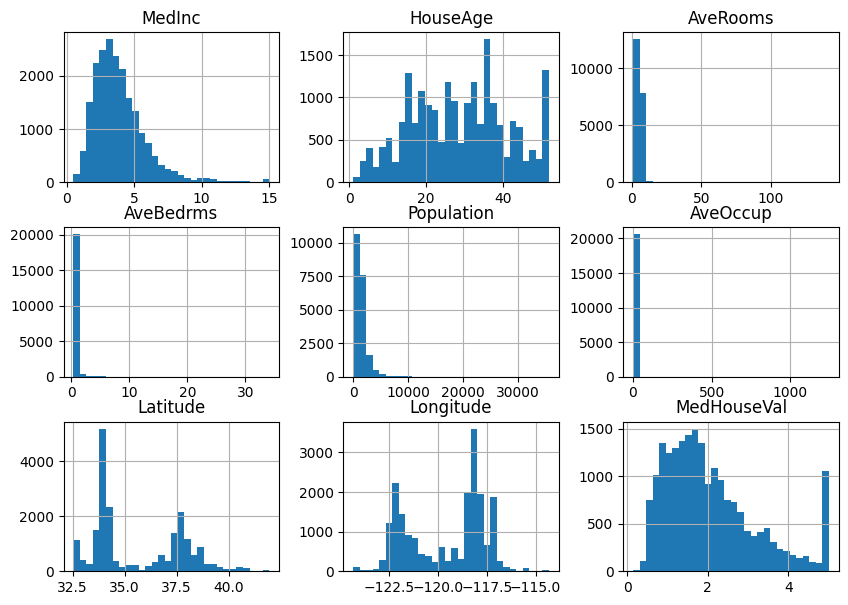

In [22]:

# This is a Python cell. 
# Put your comments and code here.
data_frame.hist(bins=30, figsize=(10,7))
plt.show()



# Boxplot for the numerical columns

Generate one Boxenplot for each column (good for large datasets)

Example code:

for column in data_frame.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

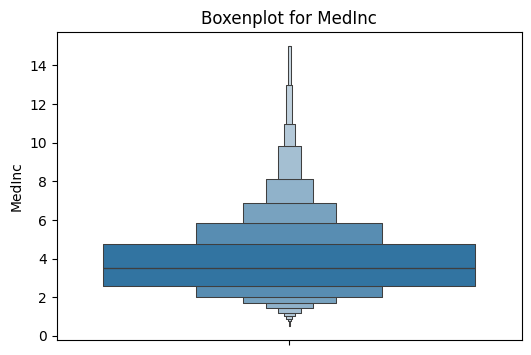

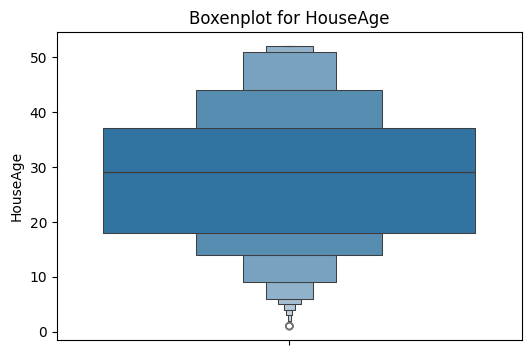

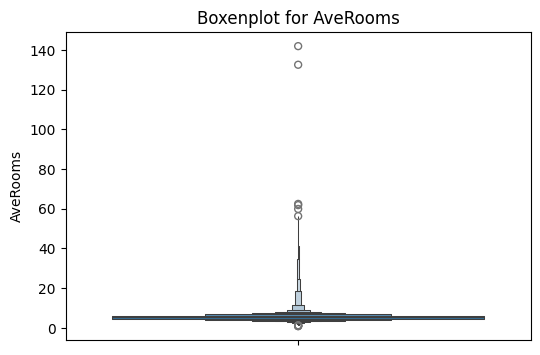

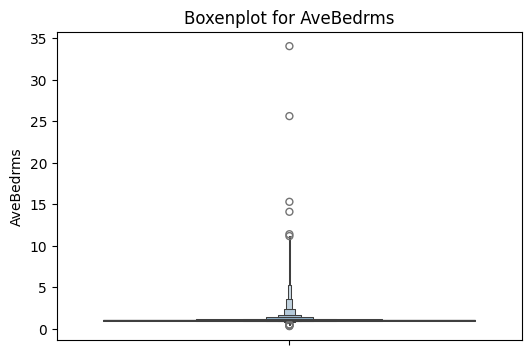

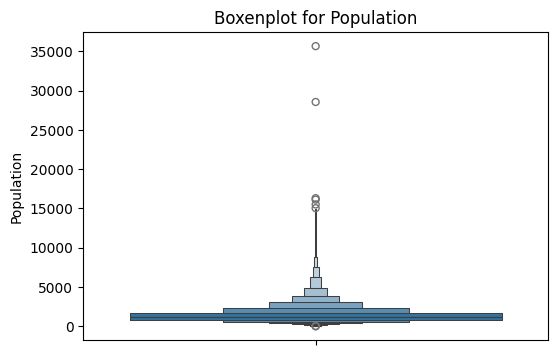

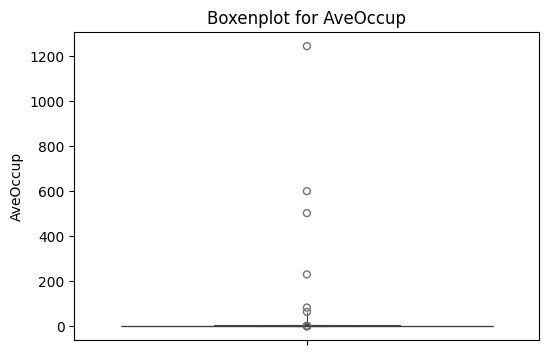

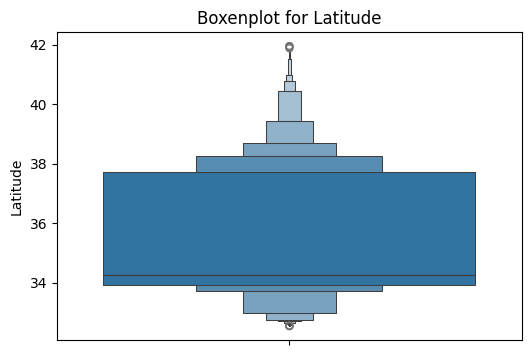

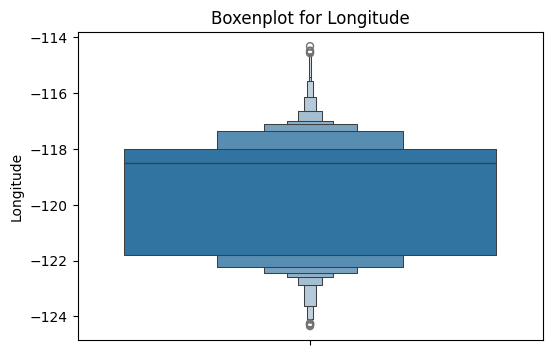

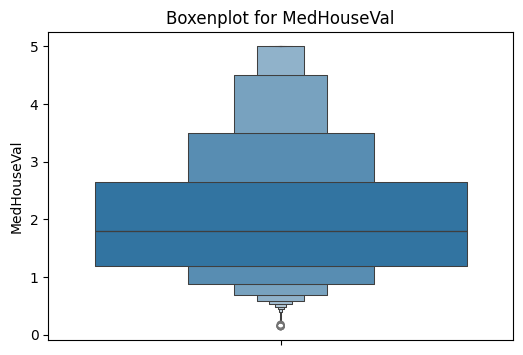

In [26]:
# This is a Python cell. 
# Put your comments and code here.

for column in data_frame.columns:
    plt.figure(figsize=(6,4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show

Third - Scatter Plots

Generate all Scatter plots (there is a LOT of data, so this will take a while)

Comment out after analysis to speed up the notebook.

Example code:

sns.pairplot(data_frame)

plt.show()

In [24]:
# This is a Python cell. 
# Put your comments and code here.



This is a Markdown Cell.

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame


Example code:

features: list = ['MedInc', 'AveRooms']

target: str = 'MedHouseVal'

df_X = data_frame[features]

df_y = data_frame[target]


In [ ]:
# This is a Python cell. 
# Put your comments and code here.



This is a Markdown Cell.


## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)


Example code:

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42)


In [ ]:
# This is a Python cell. 
# Put your comments and code here.
# 



This is a Markdown Cell.

### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


Example code:


model = LinearRegression()

model.fit(X_train, y_train)


In [ ]:
# This is a Python cell. 
# Put your comments and code here.
# 


This is a Markdown Cell.

Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.


Example code:

y_pred = model.predict(X_test)


In [ ]:

# This is a Python cell. 
# Put your comments and code here.
# 

This is a Markdown Cell. 

### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.


Example code:
  
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')



In [ ]:

# This is a Python cell. 
# Put your comments and code here.
# 


This is a Markdown Cell

Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.


Example code:

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')




In [ ]:
# This is a Python cell. 
# Put your comments and code here.
# 



This is a Markdown Cell

Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

Example code:

rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')


In [ ]:
# This is a Python cell. 
# Put your comments and code here.
# 
